<a href="https://colab.research.google.com/github/vanessa-saina/predict_bike_sharing/blob/main/project_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.4 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 104.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.3
    Uninstalling bokeh-2.4.3:
      Successfully uninstalled bokeh-2.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 0.14.4 requires bokeh<2.5.0,>=2.4.0, but you have bokeh 3.1.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels

### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "sainavanessa"
kaggle_key = "d43c141bacbe3cc0f58355b922fcd2b0"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 117MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv")
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [9]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [10]:
train_data = train[['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp','atemp', 'humidity', 'windspeed', 'count']]
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [11]:
predictor = TabularPredictor(label = 'count', eval_metric= 'root_mean_squared_error').fit(train_data = train[['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp','atemp', 'humidity', 'windspeed', 'count']] , 
                                                  time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230601_105205/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230601_105205/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

### Review AutoGluon's training run with ranking of models that did the best.

In [12]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.056462      21.762747  529.514386                0.000668           0.212042            3       True         13
1   RandomForestMSE_BAG_L2  -53.385245      15.080350  425.039740                0.618162          44.644872            2       True         12
2          LightGBM_BAG_L2  -54.902940      14.888731  411.209389                0.426543          30.814521            2       True         11
3        LightGBMXT_BAG_L2  -60.447476      20.717375  453.842951                6.255186          73.448083            2       True         10
4    KNeighborsDist_BAG_L1  -84.125061       0.127782    0.118991                0.127782           0.118991            1       True          2
5      WeightedEnsemble_L2  -84.125061       0.128757    0.981145         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -130.66666563665032

### Create predictions from test dataset

In [13]:
predictions = predictor.predict(test)
predictions = pd.DataFrame({'Datetime': test['datetime'], 'count':predictions})
predictions.head()

,Datetime,count
0,2011-01-20 00:00:00,22.729321
1,2011-01-20 01:00:00,42.552086
2,2011-01-20 02:00:00,45.755562
3,2011-01-20 03:00:00,47.971069
4,2011-01-20 04:00:00,50.380814


#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [14]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

,count
count,6493.000000
mean,100.520927
std,89.667587
min,3.091230
25%,20.164928
50%,63.763355
75%,166.097565
max,365.327515


In [15]:
# How many negative values do we have?
negative_vals = predictions.loc[predictions['count']<0, 'count']
negative_vals

Series([], Name: count, dtype: float32)

In [16]:
# Set them to zero
replaced_vals = predictions.loc[predictions['count']<0, 'count'] = 0
replaced_vals

0

### Set predictions to submission dataframe, save, and submit

In [17]:
submission["count"] = predictions['count']
submission.to_csv("submission.csv", index=False)

In [18]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:04<00:00, 44.7kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [19]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2023-06-01 11:03:16  first raw submission               complete  1.79727      1.79727       
submission_new_hpo.csv       2023-05-31 14:21:30  new features with hyperparameters  complete  0.54030      0.54030       
submission_new_features.csv  2023-05-31 14:08:43  new features                       complete  0.62517      0.62517       
submission.csv               2023-05-31 13:56:51  first raw submission               complete  1.80755      1.80755       


#### Initial score of 1.80755

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>, <Axes: >]], dtype=object)

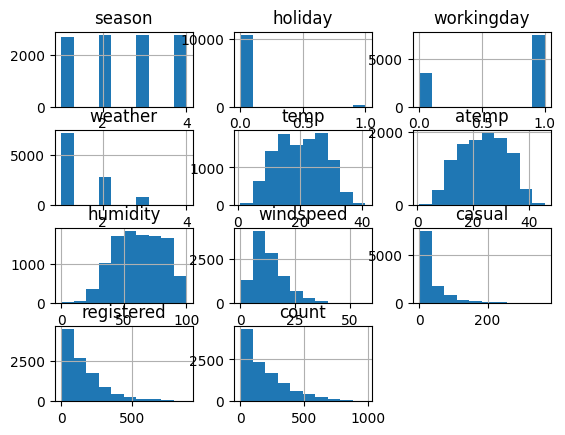

In [20]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [21]:
# create a new feature
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

train['year'] = train.loc[:,'datetime'].dt.year
train['month'] = train.loc[:,'datetime'].dt.month
train['day'] = train.loc[:,'datetime'].dt.day
train['hour'] = train.loc[:,'datetime'].dt.hour

test['year'] = test.loc[:,'datetime'].dt.year
test['month'] = test.loc[:,'datetime'].dt.month
test['day'] = test.loc[:,'datetime'].dt.day
test['hour'] = test.loc[:,'datetime'].dt.hour

train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

(None, None)

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [22]:
train["season"] = train.loc[:,'season'].astype('category')
train["weather"] = train.loc[:,'weather'].astype('category')
test["season"] = test.loc[:, 'season'].astype('category')
test["weather"] = test.loc[:,'weather'].astype('category')

In [23]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

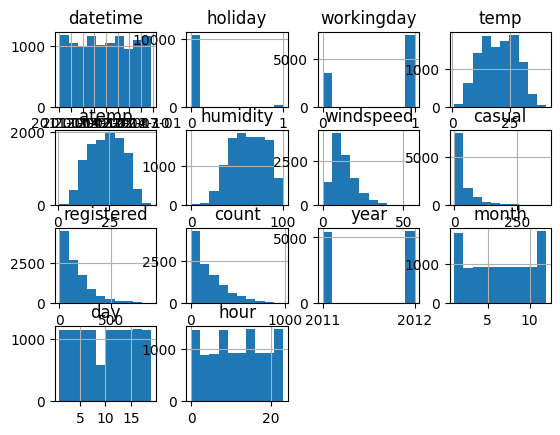

In [24]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [25]:
predictor_new_features = TabularPredictor(label = 'count', eval_metric= 'root_mean_squared_error').fit(train_data = train.drop(['casual', 'registered'], axis=1) , 
                                                  time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230601_110323/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230601_110323/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using F

In [26]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.373327      22.485870  563.711644                0.001067           0.398592            3       True         13
1          LightGBM_BAG_L2  -30.617969      20.399134  410.949439                0.444026          36.430583            2       True         10
2          CatBoost_BAG_L2  -30.872098      20.249229  437.727333                0.294121          63.208477            2       True         12
3        LightGBMXT_BAG_L2  -31.279745      21.080426  414.397407                1.125318          39.878551            2       True          9
4   RandomForestMSE_BAG_L2  -31.644206      20.621338  423.795441                0.666230          49.276585            2       True         11
5      WeightedEnsemble_L2  -32.213487      19.187288  362.087973         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.34599701170154,
  'LightGBM_BAG_L1': -33.91733862651761,
  'RandomForestMSE_BAG_L1': -38.30612025079756,
  'CatBoost_BAG_L1': -34.70947215481205,
  'ExtraTreesM

In [27]:

predictions_new = predictor_new_features.predict(test)
predictions_new = pd.DataFrame({'Datetime': test['datetime'], 'count':predictions_new})
predictions_new.head()



,Datetime,count
0,2011-01-20 00:00:00,15.378348
1,2011-01-20 01:00:00,11.125559
2,2011-01-20 02:00:00,10.290545
3,2011-01-20 03:00:00,9.167801
4,2011-01-20 04:00:00,8.051391


In [28]:
predictions_new.describe()

,count
count,6493.000000
mean,162.027817
std,141.906540
min,2.827832
25%,51.499386
50%,124.883400
75%,231.799713
max,827.343140


In [29]:
# Remember to set all negative values to zero
predictions_new[predictions_new['count']<0] = 0

In [30]:
# Same submitting predictions
submission_new_features = pd.read_csv('./sampleSubmission.csv')
submission_new_features["count"] = predictions_new['count']
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [31]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:03<00:00, 56.3kB/s]
Successfully submitted to Bike Sharing Demand

In [32]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-06-01 11:14:51  new features                       complete  0.63298      0.63298       
submission.csv               2023-06-01 11:03:16  first raw submission               complete  1.79727      1.79727       
submission_new_hpo.csv       2023-05-31 14:21:30  new features with hyperparameters  complete  0.54030      0.54030       
submission_new_features.csv  2023-05-31 14:08:43  new features                       complete  0.62517      0.62517       


#### New Score of 0.62517

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [68]:

hyperparameters = {  'NN': {'num_epochs': 5, 'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  
                    # learning rate used in training (real-valued hyperparameter searched on log-scale)
                  'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  
                    # activation function used in NN (categorical hyperparameter, default = first entry)
                  'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1)},
                    'GBM': [ {'num_boost_round': 10}, {'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}}, 'GBMLarge']
                   
                  
                     }  

time_limit = 600
num_trials = 5  
search_strategy = 'auto' 

hyperparameter_tune_kwargs = {  
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}


In [34]:
predictor_new_hpo = TabularPredictor(label='count', learner_kwargs={'ignored_columns': ["casual", "registered"]}, eval_metric='root_mean_squared_error').fit(train_data = train, time_limit=time_limit,
    hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs, presets = 'best_quality'
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230601_111453/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230601_111453/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 15
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using F

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	-123.7376	 = Validation score   (-root_mean_squared_error)
	27.94s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T2 ...
	-106.4026	 = Validation score   (-root_mean_squared_error)
	27.52s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T3 ...
	-125.1325	 = Validation score   (-root_mean_squared_error)
	29.62s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: LightGBMXT_BAG_L1 ... Tuning model for up to 89.94s of the 514.53s of remaining time.


  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBMXT_BAG_L1/T1 ...
	-34.3471	 = Validation score   (-root_mean_squared_error)
	116.73s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: NeuralNetMXNet_BAG_L1 ... Tuning model for up to 89.94s of the 397.7s of remaining time.


  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
ray::_ray_fit() (pid=15316, ip=172.28.0.12)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/ensemble/fold_fitting_strategy.py", line 374, in _ray_fit
    fold_model.fit(X=X_fold, y=y_fold, X_val=X_val_fold, y_val=y_val_fold,
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 703, in fit
    out = self._fit(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabular_nn_mxnet.py", line 156, in _fit
    train_dataset, val_dataset = self.generate_datasets(X=X, y=y, params=params, X_val=X_val, y_val=y_val)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabular_nn_mxnet.py", line 446, in generate_datasets
    train_dataset = self.process_train_data(
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabula

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L2/T1 ...
	-111.623	 = Validation score   (-root_mean_squared_error)
	35.66s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: LightGBMXT_BAG_L2 ... Tuning model for up to 61.55s of the 237.76s of remaining time.


  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBMXT_BAG_L2/T1 ...
	-33.6655	 = Validation score   (-root_mean_squared_error)
	36.61s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: NeuralNetMXNet_BAG_L2 ... Tuning model for up to 61.55s of the 201.04s of remaining time.


  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
ray::_ray_fit() (pid=17284, ip=172.28.0.12)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/ensemble/fold_fitting_strategy.py", line 374, in _ray_fit
    fold_model.fit(X=X_fold, y=y_fold, X_val=X_val_fold, y_val=y_val_fold,
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 703, in fit
    out = self._fit(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabular_nn_mxnet.py", line 156, in _fit
    train_dataset, val_dataset = self.generate_datasets(X=X, y=y, params=params, X_val=X_val, y_val=y_val)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabular_nn_mxnet.py", line 446, in generate_datasets
    train_dataset = self.process_train_data(
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabula

In [35]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -32.372340       3.369884  192.562791                0.001151           0.446634            2       True          6
1   WeightedEnsemble_L3  -32.874450       3.709459  356.597410                0.000968           0.226948            3       True         10
2  LightGBMLarge_BAG_L2  -33.360771       3.708339  319.763611                0.339168          42.566594            2       True          9
3  LightGBMLarge_BAG_L1  -33.624640       3.368552   75.383811                3.368552          75.383811            1       True          5
4  LightGBMXT_BAG_L2/T1  -33.665497       3.369324  313.803867                0.000152          36.606850            2       True          8
5  LightGBMXT_BAG_L1/T1  -34.347113       0.000181  116.732347                0.000181      

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBMLarge_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -123.7376311188275,
  'LightGBM_BAG_L1/T2': -106.40255421401322,
  'LightGBM_BAG_L1/T3': -125.13246413528407,
  'LightGBMXT_BAG_L1/T1': -34.347113482031155,
  'LightGBMLarge_BAG_L1': -33.624640133659305,
  'WeightedEnsemble_L2': -32.37234003422222,
  'LightGBM_BAG_L2/T1': -111.62303659906505,
  'LightGBMXT_BAG_L2/T1': -33.66549712645749,
  'LightGBMLarge_BAG_L2': -33.360770542616116,
  'WeightedEnsemble_L3': -32

In [36]:
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo = pd.DataFrame({'Datetime': test['datetime'], 'count':predictions_new_hpo})
predictions_new_hpo.head()


,Datetime,count
0,2011-01-20 00:00:00,14.332080
1,2011-01-20 01:00:00,0.727399
2,2011-01-20 02:00:00,-0.913842
3,2011-01-20 03:00:00,2.251842
4,2011-01-20 04:00:00,2.054384


In [37]:
predictions_new_hpo.describe()

,count
count,6493.000000
mean,191.673065
std,172.997650
min,-14.276666
25%,47.894737
50%,150.374603
75%,283.833771
max,896.136230


In [38]:
# Remember to set all negative values to zero
predictions_new_hpo[predictions_new_hpo['count']<0] = 0
predictions_new_hpo.describe()

,count
count,6493.000000
mean,191.717911
std,172.947342
min,0.000000
25%,47.894737
50%,150.374603
75%,283.833771
max,896.136230


In [39]:
# Same submitting predictions
submission_new_hpo = pd.read_csv('./submission_new_features.csv')
submission_new_hpo["count"] = predictions_new_hpo['count']
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [40]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:04<00:00, 41.5kB/s]
Successfully submitted to Bike Sharing Demand

In [63]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                             status    publicScore  privateScore  
---------------------------  -------------------  --------------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-06-01 11:45:31  new features with hyperparameters hpo2  complete  0.54093      0.54093       
submission_new_hpo.csv       2023-06-01 11:36:18  new features with hyperparameters hpo1  complete  0.54093      0.54093       
submission_new_hpo.csv       2023-06-01 11:36:01  new features with hyperparameters hpo1  complete  0.54093      0.54093       
submission_new_hpo.csv       2023-06-01 11:24:08  new features with hyperparameters       complete  0.54093      0.54093       


#### New Score of 0.54030

## Step 6_1: Hyper parameter optimization hpo1

In [42]:
import autogluon.core as ag
## From autogluon documentation

gbm_options = [{'extra_trees': True, 
                'num_boost_round': ag.space.Int(lower=100, upper=800, default=100),
                'num_leaves': ag.space.Int(lower=26, upper=66, default=36), 
                'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge']

xt_options = {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}}

xgb_options = [{'objective': 'reg:squarederror', # 'reg:linear' is deprecated
                'eval_metric': 'rmse', 
                'max_depth':ag.space.Int(lower=5, upper=8, default=6), 
                'n_estimators': ag.space.Int(lower=100, upper=500, default=100), 
                'eta':.3, 
                'subsample': 1,
                'colsample_bytree': 1}]

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'XT': xt_options,
                   'XGB': xgb_options
                  }  

time_limit = 600
num_trials = 10  
search_strategy = 'auto' 

hyperparameter_tune_kwargs = {  
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}
predictor_new_hpo1 = TabularPredictor(label='count', learner_kwargs={'ignored_columns': ["casual", "registered"]}, eval_metric='root_mean_squared_error').fit(train_data = train, 
                                                                                                                                                              time_limit=time_limit,
    hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs, presets = 'best_quality'
)


No path specified. Models will be saved in: "AutogluonModels/ag-20230601_112409/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230601_112409/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 15
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using F

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBMXT_BAG_L1/T1 ...
	-73.4652	 = Validation score   (-root_mean_squared_error)
	28.7s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBMXT_BAG_L1/T2 ...
	-41.2892	 = Validation score   (-root_mean_squared_error)
	50.54s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: LightGBM_BAG_L1 ... Tuning model for up to 71.96s of the 520.42s of remaining time.


  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	-33.9173	 = Validation score   (-root_mean_squared_error)
	68.21s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ... Tuning model for up to 71.96s of the 452.1s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L1 ...
	-38.3116	 = Validation score   (-root_mean_squared_error)
	12.13s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: XGBoost_BAG_L1 ... Tuning model for up to 71.96s of the 439.92s of remaining time.


  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	-38.07	 = Validation score   (-root_mean_squared_error)
	26.01s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: XGBoost_BAG_L1/T2 ...
	-36.7781	 = Validation score   (-root_mean_squared_error)
	34.31s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 71.96s of the 379.47s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	-33.624	 = Validation score   (-root_mean_squared_error)
	71.8s	 = Training   runtime
	3.93s	 = Validation runtime
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 302.7s of remaining time.
	-32.7332	 = Validation score  

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBMXT_BAG_L2/T1 ...
	-34.0832	 = Validation score   (-root_mean_squared_error)
	32.7s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: LightGBM_BAG_L2 ... Tuning model for up to 54.4s of the 269.41s of remaining time.


  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L2/T1 ...
	-33.0051	 = Validation score   (-root_mean_squared_error)
	47.95s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L2 ... Tuning model for up to 54.4s of the 221.33s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L2 ...
	-32.9555	 = Validation score   (-root_mean_squared_error)
	15.28s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: XGBoost_BAG_L2 ... Tuning model for up to 54.4s of the 205.98s of remaining time.


  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L2/T1 ...
	-33.1832	 = Validation score   (-root_mean_squared_error)
	33.55s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 54.4s of the 172.32s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	-33.59	 = Validation score   (-root_mean_squared_error)
	50.2s	 = Training   runtime
	0.4s	 = Validation runtime
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.0s of the 115.72s of remaining time.
	-32.6621	 = Validation score   (-root_mean_squared_error)
	0.29s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 484.61s ... Best model: "WeightedEnsemble_L3"
TabularPredictor saved. To load, use: predictor = TabularPredic

In [43]:
predictor_new_hpo1.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                   model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    WeightedEnsemble_L3 -32.662052       3.935726  421.457153                0.000669           0.292090            3       True         14
1    WeightedEnsemble_L2 -32.733244       3.934992  237.417452                0.000959           0.432446            2       True          8
2   ExtraTreesMSE_BAG_L2 -32.955534       3.934586  306.964988                0.000229          15.275911            2       True         11
3     LightGBM_BAG_L2/T1 -33.005104       3.934520  339.640137                0.000164          47.951060            2       True         10
4      XGBoost_BAG_L2/T1 -33.183212       3.934522  325.236903                0.000166          33.547826            2       True         12
5   LightGBMLarge_BAG_L2 -33.589969       4.332125  341.888218                0.397769      

{'model_types': {'LightGBMXT_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T2': 'StackerEnsembleModel_XGBoost',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L2/T1': 'StackerEnsembleModel_XGBoost',
  'LightGBMLarge_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBMXT_BAG_L1/T1': -73.46520573556604,
  'LightGBMXT_BAG_L1/T2': -41.28920733775699,
  'LightGBM_BAG_L1/T1': -33.91733862651761,
  'ExtraTreesMSE_BAG_L1': -38.31157013220686,
  'XGBoost_BAG_L1/T1': -38.069996469

In [44]:
predictions_new_hpo1 = predictor_new_hpo1.predict(test)
predictions_new_hpo1 = pd.DataFrame({'Datetime': test['datetime'], 'count':predictions_new_hpo1})
predictions_new_hpo1.head()


,Datetime,count
0,2011-01-20 00:00:00,12.126279
1,2011-01-20 01:00:00,6.209788
2,2011-01-20 02:00:00,4.923076
3,2011-01-20 03:00:00,4.415706
4,2011-01-20 04:00:00,4.371888


In [45]:
predictions_new_hpo1.describe()

,count
count,6493.000000
mean,192.072739
std,173.927582
min,4.132061
25%,46.192467
50%,148.404800
75%,285.140717
max,882.891785


In [46]:
# Remember to set all negative values to zero
predictions_new_hpo1[predictions_new_hpo1['count']<0] = 0
predictions_new_hpo1.describe()

,count
count,6493.000000
mean,192.072739
std,173.927582
min,4.132061
25%,46.192467
50%,148.404800
75%,285.140717
max,882.891785


In [48]:
# Same submitting predictions
submission_new_hpo1 = pd.read_csv('./submission_new_hpo.csv')
submission_new_hpo1["count"] = predictions_new_hpo1['count']
submission_new_hpo1.to_csv("submission_new_hpo1.csv", index=False)

In [50]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters hpo1"

100% 188k/188k [00:02<00:00, 95.6kB/s]
Successfully submitted to Bike Sharing Demand

In [51]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                             status    publicScore  privateScore  
---------------------------  -------------------  --------------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-06-01 11:36:18  new features with hyperparameters hpo1  complete  0.54093      0.54093       
submission_new_hpo.csv       2023-06-01 11:36:01  new features with hyperparameters hpo1  complete  0.54093      0.54093       
submission_new_hpo.csv       2023-06-01 11:24:08  new features with hyperparameters       complete  0.54093      0.54093       
submission_new_features.csv  2023-06-01 11:14:51  new features                            complete  0.63298      0.63298       


#### New Score of 0.54093

## Step 6_2: Hyper parameter optimization hpo2

In [52]:
import autogluon.core as ag
## From autogluon documentation

gbm_options = [{'extra_trees': True, 
                'num_boost_round': ag.space.Int(lower=100, upper=800, default=100),
                'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
                'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge']


xt_options = {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}}


xgb_options = [{'objective': 'reg:squarederror', 
                'eval_metric': 'rmse', 
                'max_depth':ag.space.Int(lower=5, upper=8, default=6), 
                'n_estimators': ag.space.Int(lower=100, upper=500, default=100), 
                'eta':.3, 
                'subsample': 1,
                'colsample_bytree': 1}]

knn_options = [{'weights': 'uniform', 'ag_args': {'name_suffix': 'Uniform'}}, 
               {'weights': 'distance', 'ag_args': {'name_suffix': 'Distance'}}]

hyperparameters = {  
                   'GBM': gbm_options,
                   'XT': xt_options,
                   'XGB': xgb_options,
                   'KNN': knn_options
                  }  

time_limit = 600
num_trials = 20  
search_strategy = 'auto' 

hyperparameter_tune_kwargs = {  
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}
predictor_new_hpo2 = TabularPredictor(label='count', learner_kwargs={'ignored_columns': ["casual", "registered"]}, eval_metric='root_mean_squared_error').fit(train_data = train, 
                                                                                                                                                              time_limit=time_limit,
    hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs, presets = 'best_quality'
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230601_113620/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230601_113620/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 15
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using F

  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBMXT_BAG_L1/T1 ...
	-73.4652	 = Validation score   (-root_mean_squared_error)
	31.74s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: LightGBM_BAG_L1 ... Tuning model for up to 51.39s of the 567.43s of remaining time.


  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	-33.9173	 = Validation score   (-root_mean_squared_error)
	65.42s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ... Tuning model for up to 51.39s of the 501.94s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L1 ...
	-38.3116	 = Validation score   (-root_mean_squared_error)
	11.35s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: XGBoost_BAG_L1 ... Tuning model for up to 51.39s of the 490.55s of remaining time.


  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	-38.07	 = Validation score   (-root_mean_squared_error)
	25.31s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: XGBoost_BAG_L1/T2 ...
	-37.0633	 = Validation score   (-root_mean_squared_error)
	36.78s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 51.39s of the 428.35s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	-33.6247	 = Validation score   (-root_mean_squared_error)
	74.02s	 = Training   runtime
	3.1s	 = Validation runtime
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 346.73s of remaining time.
	-32.6961	 = Validation score

  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBMXT_BAG_L2/T1 ...
	-33.0564	 = Validation score   (-root_mean_squared_error)
	28.91s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBMXT_BAG_L2/T2 ...
	-31.8905	 = Validation score   (-root_mean_squared_error)
	39.97s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: LightGBM_BAG_L2 ... Tuning model for up to 62.33s of the 277.27s of remaining time.


  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L2/T1 ...
	-30.906	 = Validation score   (-root_mean_squared_error)
	35.66s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L2 ... Tuning model for up to 62.33s of the 241.46s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L2 ...
	-32.1354	 = Validation score   (-root_mean_squared_error)
	18.19s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: XGBoost_BAG_L2 ... Tuning model for up to 62.33s of the 223.04s of remaining time.


  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L2/T1 ...
	-31.3746	 = Validation score   (-root_mean_squared_error)
	26.27s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: XGBoost_BAG_L2/T2 ...
	-31.4034	 = Validation score   (-root_mean_squared_error)
	44.11s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 62.33s of the 152.51s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	-31.8063	 = Validation score   (-root_mean_squared_error)
	52.5s	 = Training   runtime
	0.85s	 = Validation runtime
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.0s of the 95.59s of remaining time.
	-30.6967	 = Validation scor

In [53]:
predictor_new_hpo2.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                        model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         WeightedEnsemble_L3  -30.696660       3.105812  420.459070                0.000914           0.551643            3       True         17
1          LightGBM_BAG_L2/T1  -30.905997       3.104312  280.649210                0.000166          35.658642            2       True         12
2           XGBoost_BAG_L2/T1  -31.374622       3.104288  271.256868                0.000142          26.266300            2       True         14
3           XGBoost_BAG_L2/T2  -31.403445       3.104293  289.101259                0.000148          44.110691            2       True         15
4        LightGBMLarge_BAG_L2  -31.806345       3.954480  297.495021                0.850334          52.504453            2       True         16
5        LightGBMXT_BAG_L2/T2  -31.890543       3.104301

{'model_types': {'KNeighborsUniform_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDistance_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T2': 'StackerEnsembleModel_XGBoost',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L2/T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L2/T2': 'StackerEnsembleModel_XGBoost',
  'LightGBMLarge_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUniform_BAG_L1': -101.54619908446

In [54]:
predictions_new_hpo2 = predictor_new_hpo2.predict(test)
predictions_new_hpo2 = pd.DataFrame({'Datetime': test['datetime'], 'count':predictions_new_hpo2})
predictions_new_hpo2.head()


,Datetime,count
0,2011-01-20 00:00:00,13.979441
1,2011-01-20 01:00:00,9.524728
2,2011-01-20 02:00:00,8.962135
3,2011-01-20 03:00:00,7.891836
4,2011-01-20 04:00:00,6.972209


In [55]:
predictions_new_hpo2.describe()

,count
count,6493.000000
mean,158.173798
std,140.800461
min,3.208792
25%,52.023964
50%,118.273102
75%,228.002029
max,803.296753


In [56]:
# Remember to set all negative values to zero
predictions_new_hpo2[predictions_new_hpo2['count']<0] = 0
predictions_new_hpo2.describe()

,count
count,6493.000000
mean,158.173798
std,140.800461
min,3.208792
25%,52.023964
50%,118.273102
75%,228.002029
max,803.296753


In [57]:
# Same submitting predictions
submission_new_hpo2 = pd.read_csv('./submission_new_hpo1.csv')
submission_new_hpo2["count"] = predictions_new_hpo2['count']
submission_new_hpo2.to_csv("submission_new_hpo2.csv", index=False)

In [58]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters hpo2"

100% 188k/188k [00:04<00:00, 41.7kB/s]
Successfully submitted to Bike Sharing Demand

In [67]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 8

fileName                     date                 description                             status    publicScore  privateScore  
---------------------------  -------------------  --------------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-06-01 11:45:31  new features with hyperparameters hpo2  complete  0.54093      0.54093       
submission_new_hpo.csv       2023-06-01 11:36:18  new features with hyperparameters hpo1  complete  0.54093      0.54093       
submission_new_hpo.csv       2023-06-01 11:36:01  new features with hyperparameters hpo1  complete  0.54093      0.54093       
submission_new_hpo.csv       2023-06-01 11:24:08  new features with hyperparameters       complete  0.54093      0.54093       
submission_new_features.csv  2023-06-01 11:14:51  new features                            complete  0.63298      0.63298       
submission.csv               2023-06-01 11:03:16  first raw submission                    complete  1.79

#### New Score of 0.54093

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

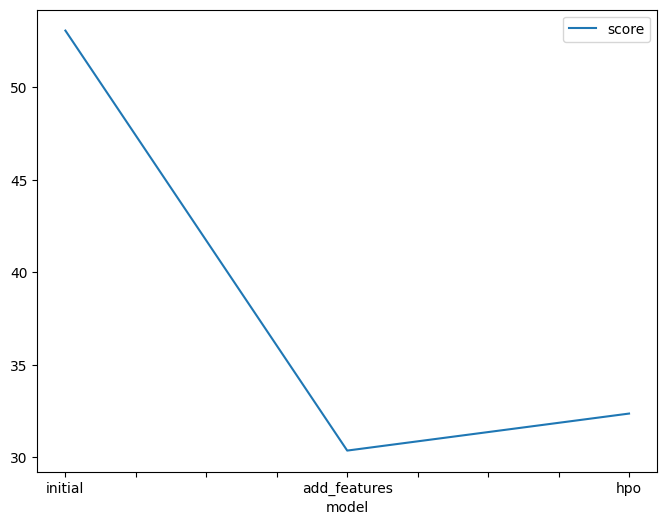

In [64]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [53.056462 , 30.373327 , 32.372340]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

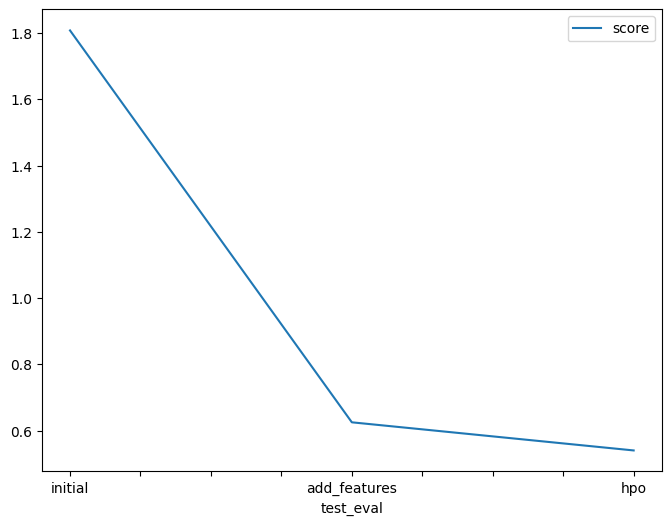

In [65]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80755, 0.62517, 0.54030]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [62]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": [?, ?, ?],
    "hpo2": [?, ?, ?],
    "hpo3": [?, ?, ?],
    "score": [1.80482, 0.62192, 0.54030 ]
})

SyntaxError: ignored